## Preprocessing

In [319]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [320]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN','NAME'], axis=1, inplace=True) 
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [321]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [322]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [323]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace=['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']    

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [324]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [325]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classifications_to_replace=application_df['CLASSIFICATION'].value_counts().loc[lambda x : x<=1].to_frame()
classifications_to_replace=classifications_to_replace.reset_index()
classifications_to_replace=list(classifications_to_replace['index'])
classifications_to_replace

['C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [326]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
    
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Other       26
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C1720        6
C2400        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C1267        2
C1256        2
C1234        2
C1246        2
C3200        2
Name: CLASSIFICATION, dtype: int64

In [327]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df )
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [329]:
# Split our preprocessed data into our features and target arrays

y=application_df['IS_SUCCESSFUL'].values.reshape(-1,1)
X=application_df.copy()
X.drop('IS_SUCCESSFUL', axis=1, inplace=True)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [330]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [331]:
#number of features
X_train_scaled.shape[1]

83

In [332]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=166, activation="relu", input_dim=83))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=166, activation="relu", input_dim=166))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 166)               13944     
                                                                 
 dense_41 (Dense)            (None, 166)               27722     
                                                                 
 dense_42 (Dense)            (None, 1)                 167       
                                                                 
Total params: 41,833
Trainable params: 41,833
Non-trainable params: 0
_________________________________________________________________


In [333]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=["accuracy"])

In [334]:
# Train the model
#fit_model = nn.fit(X_train_scaled, y_train, epochs=100)
import keras
from keras.callbacks import Callback
mc = keras.callbacks.ModelCheckpoint('AlphabetSoupCharity_callback.h5', 
                                    save_weights_only=True, period=5)
#fit_model = nn.fit(X_train, y_train,callbacks=[mc], epochs=100)
fit_model = nn.fit(X_train_scaled, y_train,callbacks=[mc], epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5728 - accuracy: 0.7204
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5535 - accuracy: 0.7307
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5495 - accuracy: 0.7311
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5479 - accuracy: 0.7313
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5461 - accuracy: 0.7322
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5450 - accuracy: 0.7343
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5446 - accuracy: 0.7340
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5426 - accuracy: 0.7349
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5428 - accuracy: 0.7364
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5420 - accura

In [335]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.8392 - accuracy: 0.7304 - 459ms/epoch - 2ms/step
Loss: 0.8391736149787903, Accuracy: 0.7303789854049683


In [336]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [337]:
import h5py

In [339]:
# Export our model to HDF5 file
from keras.models import load_model
nn.save('AlphabetSoupCharity.h5')

# returns a compiled model
# identical to the previous one
nn_1 = load_model('AlphabetSoupCharity.h5')

In [345]:
X.tail()

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
34294,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34298,1,36500179,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


<Axes: >

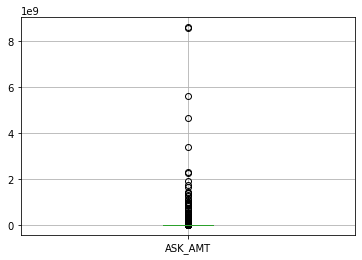

In [373]:
#Checking the outliers in ASK_AMT feature
X.boxplot(column='ASK_AMT')

In [347]:
#Decribing the feature
X[['ASK_AMT']].describe()

,ASK_AMT
count,3.429900e+04
mean,2.769199e+06
std,8.713045e+07
min,5.000000e+03
25%,5.000000e+03
50%,5.000000e+03
75%,7.742000e+03
max,8.597806e+09


In [348]:
#Finding value at 2nd percentile of this feature
X[['ASK_AMT']].quantile(q=0.02)

ASK_AMT    5000.0
Name: 0.02, dtype: float64

In [349]:
#Finding value at 98nd percentile of this feature
X[['ASK_AMT']].quantile(q=0.98)

ASK_AMT    4484725.12
Name: 0.98, dtype: float64

In [350]:
#Removing the top 2 percentile as they are outliers
X_2 = X.loc[ X['ASK_AMT'] <= 4484725.12, : ]

y_2 = y[X_2.index]

In [351]:
X_2.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     8,     9,
               10,
            ...
            34288, 34289, 34290, 34291, 34292, 34293, 34294, 34295, 34296,
            34297],
           dtype='int64', length=33613)

In [352]:
y_2

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [353]:
X_2.tail()

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
34293,1,5000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34294,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [354]:
X_2['STATUS'].value_counts()

1    33608
0        5
Name: STATUS, dtype: int64

In [355]:
X_2 = X_2.drop('STATUS', axis=1)


In [356]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state=1)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [357]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn_2 = tf.keras.models.Sequential()

# First hidden layer
nn_2.add(tf.keras.layers.Dense(units=166, activation="relu", input_dim=82))


# Second hidden layer
nn_2.add(tf.keras.layers.Dense(units=166, activation="relu", input_dim=166))

# Third hidden layer
nn_2.add(tf.keras.layers.Dense(units=83, activation="relu", input_dim=166))

# Output layer
nn_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 166)               13778     
                                                                 
 dense_44 (Dense)            (None, 166)               27722     
                                                                 
 dense_45 (Dense)            (None, 83)                13861     
                                                                 
 dense_46 (Dense)            (None, 1)                 84        
                                                                 
Total params: 55,445
Trainable params: 55,445
Non-trainable params: 0
_________________________________________________________________


In [358]:
# Compile the model
nn_2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=["accuracy"])

mc = keras.callbacks.ModelCheckpoint('AlphabetSoupCharity_callback_2.h5', 
                                    save_weights_only=True, period=5)
#fit_model = nn.fit(X_train, y_train,callbacks=[mc], epochs=100)
fit_model = nn_2.fit(X_train_scaled, y_train,callbacks=[mc], epochs=100)

Epoch 1/100
788/788 [==============================] - 3s 3ms/step - loss: 0.5661 - accuracy: 0.7243
Epoch 2/100
788/788 [==============================] - 2s 2ms/step - loss: 0.5498 - accuracy: 0.7320
Epoch 3/100
788/788 [==============================] - 2s 3ms/step - loss: 0.5455 - accuracy: 0.7352
Epoch 4/100
788/788 [==============================] - 2s 3ms/step - loss: 0.5439 - accuracy: 0.7369
Epoch 5/100
788/788 [==============================] - 2s 2ms/step - loss: 0.5424 - accuracy: 0.7366
Epoch 6/100
788/788 [==============================] - 2s 3ms/step - loss: 0.5406 - accuracy: 0.7366
Epoch 7/100
788/788 [==============================] - 2s 3ms/step - loss: 0.5398 - accuracy: 0.7380
Epoch 8/100
788/788 [==============================] - 2s 3ms/step - loss: 0.5389 - accuracy: 0.7395
Epoch 9/100
788/788 [==============================] - 3s 3ms/step - loss: 0.5385 - accuracy: 0.7390
Epoch 10/100
788/788 [==============================] - 2s 3ms/step - loss: 0.5370 - accura

In [372]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


263/263 - 0s - loss: 0.6488 - accuracy: 0.7310 - 477ms/epoch - 2ms/step
Loss: 0.6487845182418823, Accuracy: 0.7309614419937134


<Axes: >

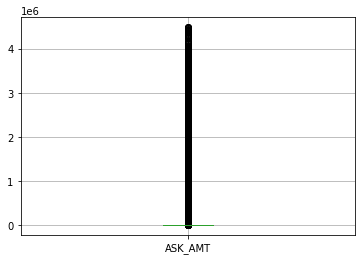

In [365]:
#outliers got removed 
X_2.boxplot(column='ASK_AMT')

In [368]:
#STATUS column was removed as this column hold highly unbalanced data
X_2.columns

Index(['ASK_AMT', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C0', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C1230', 'CLASSIFICATION_C1234', 'CLASSIFICATION_C1235',
       'CLASSIFICATION_C1237', 'CLASSIFICATION_C1238', 'CLASSIFICATION_C1240',
       'CLASSIFICATION_C1246', 'CLASSIFICATION_C1250', 'CLASSIFICATION_C1256',
       'CLASSIFICATION_C1257', 'CLASSIFICATION_C1260', 'CLASSIFICATION_C1267',
       'CLASSIFICATION_C1270', 'CLASSIFICATION_C1278', 'CLASSIFICATION_C1280',
       'CLASSIFICATION_C1300', 'CLASSIFICATION_C1400', 'CLASSIFICATION_C1500',
       'CLASSIFICATION_C1600